# Import Relevant Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns

## Load the Data:

In [3]:
data=pd.read_csv("C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv")

In [4]:
data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


### Some Operations on Dataset to understand the data:

In [5]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [6]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [8]:
data.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,...,0,0,0,0,0,0,0,other scientist,na,M


#### <u>dataframe.info():</u> Gives the information about the dataframe.The information contains the no of columns,columns label,column data type,memeory usage,range index, and the no of cells in each column(non-null values).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

####  <u>dataframe.shape:</u> Returns tuple of shape (rows ,columns) of dataframe/series

In [10]:
data.shape

(742, 42)

#### <u>data.duplicated.sum()</u>: Returns the no of duplicated rows in the dataset.

In [11]:
data.duplicated().sum()

0

#### <u>dataframe.describe():</u> It describes the numerical data present in the  dataframe .Contains these information of the each numerical data count,mean,std,min,25%50%,75% and max

In [11]:
data.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### <u> dataframe.nunique():</u> Returns the no of unique values for each column.

In [12]:
data.nunique()

index                 742
Job Title             264
Salary Estimate       416
Job Description       463
Rating                 31
Company Name          343
Location              200
Headquarters          198
Size                    8
Founded               102
Type of ownership       9
Industry               60
Sector                 25
Revenue                13
Competitors           128
Hourly                  2
Employer provided       2
Lower Salary          113
Upper Salary          162
Avg Salary(K)         219
company_txt           343
Job Location           37
Age                   102
Python                  2
spark                   2
aws                     2
excel                   2
sql                     2
sas                     2
keras                   2
pytorch                 2
scikit                  2
tensor                  2
hadoop                  2
tableau                 2
bi                      2
flink                   2
mongo                   2
google_an   

#### <u>dataframe.count()</u>: Gives the count the data no-null values in the dataframe

In [12]:
data.count()

index                 742
Job Title             742
Salary Estimate       742
Job Description       742
Rating                742
Company Name          742
Location              742
Headquarters          742
Size                  742
Founded               742
Type of ownership     742
Industry              742
Sector                742
Revenue               742
Competitors           742
Hourly                742
Employer provided     742
Lower Salary          742
Upper Salary          742
Avg Salary(K)         742
company_txt           742
Job Location          742
Age                   742
Python                742
spark                 742
aws                   742
excel                 742
sql                   742
sas                   742
keras                 742
pytorch               742
scikit                742
tensor                742
hadoop                742
tableau               742
bi                    742
flink                 742
mongo                 742
google_an   

#### Skills set in the dataframe, which requried for the different jobs:

In [13]:
data.columns[23:39]

Index(['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an'],
      dtype='object')

## visualization of dataframe:

#### Counting the Size of companies hiring the data scientists:

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '501 - 1000 '),
  Text(1, 0, '10000+ '),
  Text(2, 0, '1001 - 5000 '),
  Text(3, 0, '51 - 200 '),
  Text(4, 0, '201 - 500 '),
  Text(5, 0, '5001 - 10000 '),
  Text(6, 0, '1 - 50 '),
  Text(7, 0, 'unknown')])

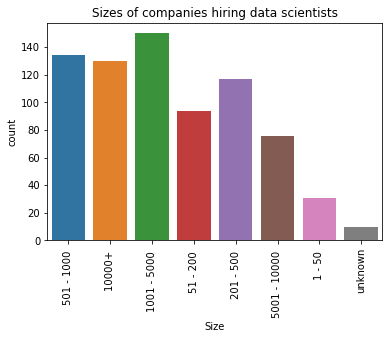

In [15]:
sns.countplot(x = 'Size', data=data )
plt.title('Sizes of companies hiring data scientists')
plt.xticks(rotation = 'vertical')

#### Counting the Rating in a given range :

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '5.0')])

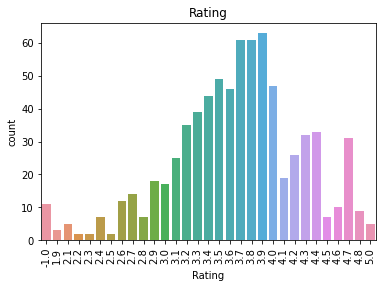

In [15]:
sns.countplot(x = 'Rating', data=data )
plt.title('Rating')
plt.xticks(rotation = 'vertical')

#### Separeting the Job titles by using the pie plot : 

Text(0.5, 1.0, 'Separated by Job title')

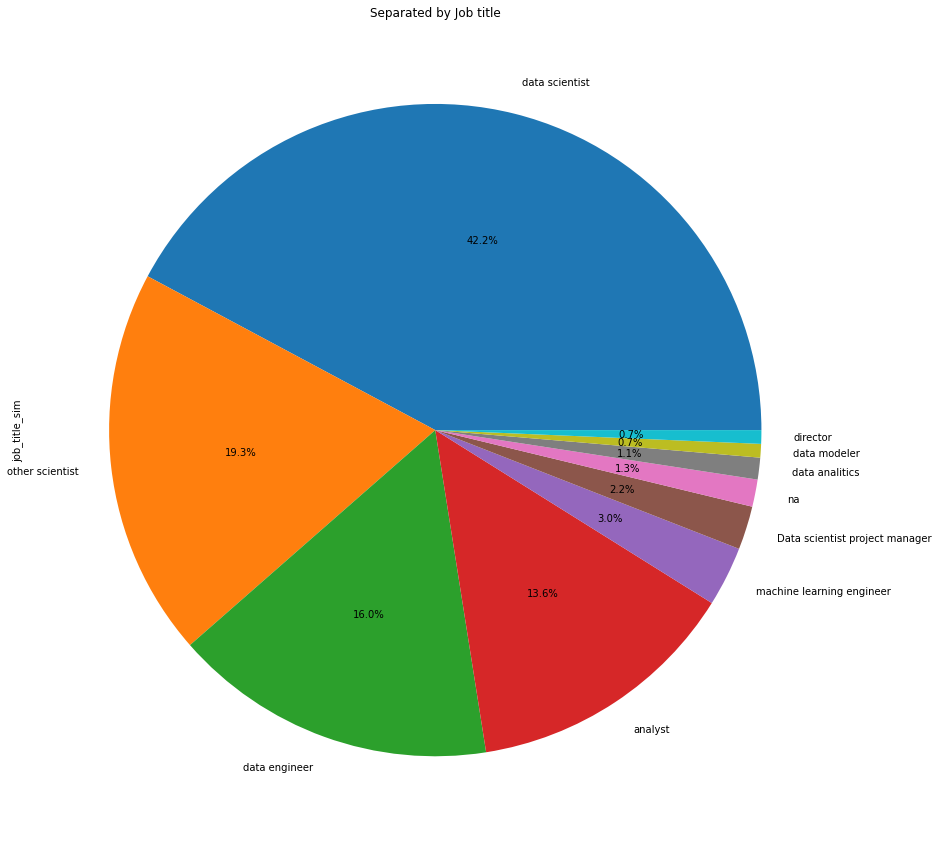

In [16]:
a=data['job_title_sim'].value_counts().plot.pie(figsize=(15,15), autopct='%1.1f%%')
plt.title("Separated by Job title")

#### Grouping up of job_title_sim with the mean of the lower,upper and avg salaries:

In [17]:
salary_label=['Lower Salary', 'Upper Salary', 'Avg Salary(K)']
salary_by_title=data.groupby('job_title_sim')[salary_label].mean()
salary_by_title

,Lower Salary,Upper Salary,Avg Salary(K)
job_title_sim,,,
Data scientist project manager,50.187500,96.250000,73.218750
analyst,47.089109,85.138614,66.113861
data analitics,55.750000,82.750000,69.250000
data engineer,76.151261,134.655462,105.403361
data modeler,56.400000,98.600000,77.500000
data scientist,90.108626,146.479233,118.293930
director,94.800000,166.800000,130.800000
machine learning engineer,90.363636,162.500000,126.431818
na,64.600000,118.300000,91.450000


#### Grouping up of range of number of employess working in the company by lower,upper and avg salaries:

In [18]:
salary_labels = ['Lower Salary', 'Upper Salary', 'Avg Salary(K)']
salary_by_co_size = data.groupby('Size')[salary_labels].mean()
salary_by_co_size

,Lower Salary,Upper Salary,Avg Salary(K)
Size,,,
1 - 50,78.580645,131.548387,105.064516
10000+,83.661538,141.946154,112.803846
1001 - 5000,68.953333,120.426667,94.690000
201 - 500,72.136752,128.358974,100.247863
5001 - 10000,70.421053,124.552632,97.486842
501 - 1000,66.865672,116.141791,91.503731
51 - 200,84.468085,139.074468,111.771277
unknown,112.100000,142.000000,127.050000


### Working on "skill set" of the dataset with the "job_title_sim":

In [13]:
data.columns[23:39]

Index(['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
       'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo',
       'google_an'],
      dtype='object')

In [14]:
skill= ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_by_title = data.groupby('job_title_sim')[skill].sum()
skills_by_title.style.background_gradient(cmap='Greens', axis='columns')

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,
Data scientist project manager,4,0,2,11,11,0,0,0,0,0,0,12,2,0,0,0
analyst,31,6,10,77,75,11,0,0,0,0,3,40,17,0,3,11
data analitics,5,0,0,4,4,2,0,0,0,0,0,4,2,0,0,0
data engineer,77,67,59,54,87,1,0,0,0,2,50,11,3,6,13,0
data modeler,2,1,2,4,4,0,0,0,0,0,1,0,2,0,0,0
data scientist,240,84,79,155,176,50,29,33,47,60,60,76,28,4,19,3
director,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0
machine learning engineer,18,4,6,7,13,0,0,5,7,9,4,0,0,0,0,0
na,4,5,3,9,7,0,0,0,0,0,6,5,2,0,2,0


### Working on Skills sets to differntiate the columns By "1" and "0" 
- '1' Skills is requried.
- '0' Others

#### Preparing the dataset that contains only the skill set requried for different job_title_sim

In [21]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [22]:
data.drop(data.iloc[:, 0:23], axis=1,inplace=True)

In [16]:
data.to_csv("C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv'

In [24]:
data

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [25]:
data.drop(data.iloc[:, 16:], axis=1,inplace=True)

In [26]:
data

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
738,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Creating the new dataset with name"nwe_data_cleaned_2021.csv":
- Contains only skill set.

In [27]:
data.to_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\nwe_data_cleaned_2021.csv")

In [28]:
data

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
738,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
739,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
740,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Replacing the '0' value with the NaN (not a number) in dataset:

In [29]:
data.replace(0,np.NaN,inplace=True)

In [30]:
data.to_csv("C:\\Users\\akhil\\OneDrive\\Desktop\\nwe_data_cleaned_2021.csv")

In [31]:
data

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
739,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Showing the non-null values in the dataset:

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Python     392 non-null    float64
 1   spark      167 non-null    float64
 2   aws        176 non-null    float64
 3   excel      388 non-null    float64
 4   sql        380 non-null    float64
 5   sas        66 non-null     float64
 6   keras      29 non-null     float64
 7   pytorch    39 non-null     float64
 8   scikit     54 non-null     float64
 9   tensor     72 non-null     float64
 10  hadoop     124 non-null    float64
 11  tableau    148 non-null    float64
 12  bi         56 non-null     float64
 13  flink      10 non-null     float64
 14  mongo      37 non-null     float64
 15  google_an  14 non-null     float64
dtypes: float64(16)
memory usage: 92.9 KB


#### Suming the null values in the each columns:

In [35]:
data.isnull().sum()

Python       350
spark        575
aws          566
excel        354
sql          362
sas          676
keras        713
pytorch      703
scikit       688
tensor       670
hadoop       618
tableau      594
bi           686
flink        732
mongo        705
google_an    728
dtype: int64

In [36]:
data.nunique()

Python       1
spark        1
aws          1
excel        1
sql          1
sas          1
keras        1
pytorch      1
scikit       1
tensor       1
hadoop       1
tableau      1
bi           1
flink        1
mongo        1
google_an    1
dtype: int64

## Visualizating the each column by using the missingno library to visualize the required skills in each column:

In [50]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

In [53]:
mis_val_colors=[]
for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('red')
    else:
        mis_val_colors.append('grey')


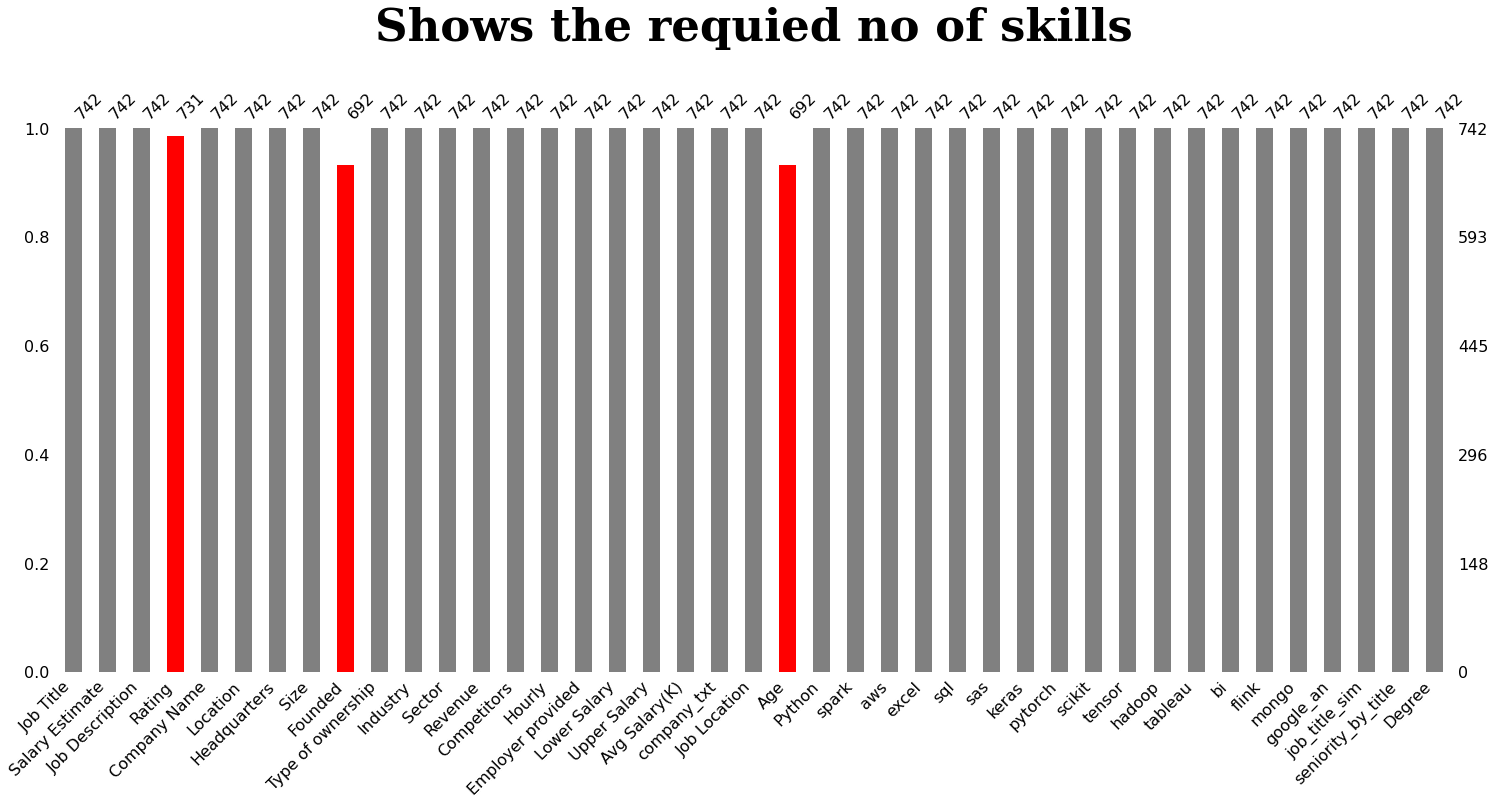

In [52]:
msn.bar(data, color=mis_val_colors)
plt.title('Shows the requied no of skills', size=45, y=1.15, **hfont)
plt.show()

## Visualization by the main dataset by Age of company:

In [55]:
data=pd.read_csv("C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv")

In [56]:
data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


C:\Users\Likhit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


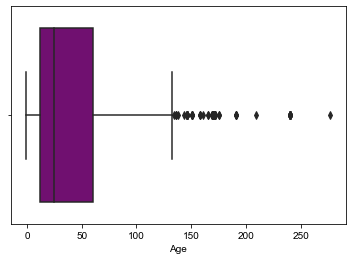

In [57]:
sns.boxplot(data["Age"],color='purple')
sns.set(rc={"figure.figsize":(20,20)})


### Demanded skills

In [59]:
data=pd.read_csv("C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv")

In [60]:
data

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [65]:
data_skills=data.loc[:,'Python':'google_an']
print(data_skills)

     Python  spark  aws  excel  sql  sas  keras  pytorch  scikit  tensor  \
0         1      0    0      1    0    1      0        0       0       0   
1         1      0    0      0    0    0      0        0       0       0   
2         1      1    0      1    1    1      0        0       0       0   
3         1      0    0      0    0    0      0        0       0       0   
4         1      0    0      1    1    1      0        0       0       0   
..      ...    ...  ...    ...  ...  ...    ...      ...     ...     ...   
737       0      0    1      0    0    0      0        0       0       0   
738       1      1    1      0    1    0      0        0       0       0   
739       0      0    0      1    0    0      0        0       0       0   
740       0      0    0      1    0    0      0        0       0       0   
741       1      0    0      0    0    0      0        0       0       0   

     hadoop  tableau  bi  flink  mongo  google_an  
0         0        1   1      0    

In [66]:
skills=data_skills.columns.tolist()

In [67]:
print(skills)

['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']


In [68]:
[data_skills[i].unique() for i in skills]

[array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64)]

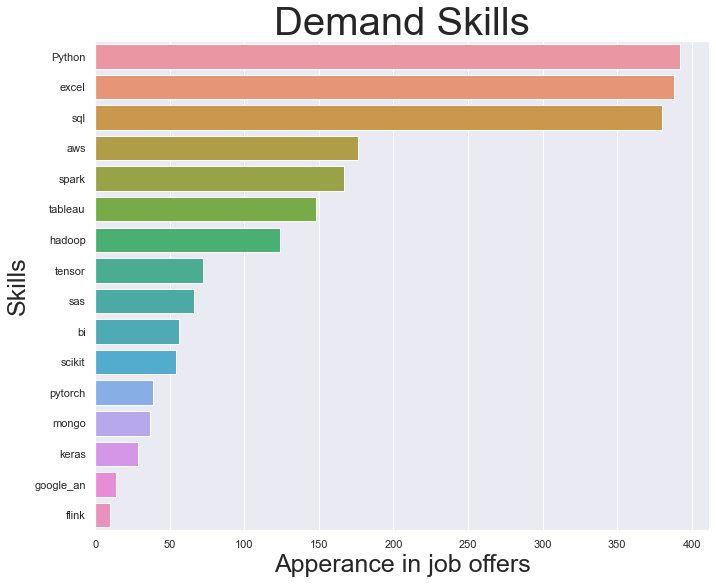

In [49]:
##demand skills
plt.figure(figsize=(11,9))
sns.barplot(x=data_skills.sum().sort_values(ascending=Falseal).vues,y=data_skills.sum().sort_values(ascending=False).index)
plt.ylabel('Skills',size=25)
plt.xlabel('Apperance in job offers',size=25)
plt.title('Demand Skills',size=40)
plt.show()

## working on duplicates
- Index column in the dataset makes the every row unique , we have to drop the that index colum to work on duplicates in the dataset.
- Also we can visualize some relation between the different columns.

In [50]:
data.drop(columns=['index'],inplace=True)

In [51]:
data.duplicated().sum()

275

In [52]:
data.drop_duplicates(inplace=True)


In [53]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [54]:
data.shape

(467, 41)

In [55]:
data.replace('-1',np.nan,inplace=True)
data.replace(-1,np.nan,inplace=True)
data.replace('na',np.nan,inplace=True)

In [56]:
hfont = {'fontname':'serif', 'weight': 'bold'}
two_colors = ['#dd38ff', '#5727ed']
five_colors = ['#3E1CA8', '#5727ed', '#C82EE8', '#dd38ff', '#EC96FE']

In [57]:
mis_val_colors=[]
for col in data.columns:
    if data[col].isna().sum() != 0:
        mis_val_colors.append('#fe1969')
    else:
        mis_val_colors.append('gray')


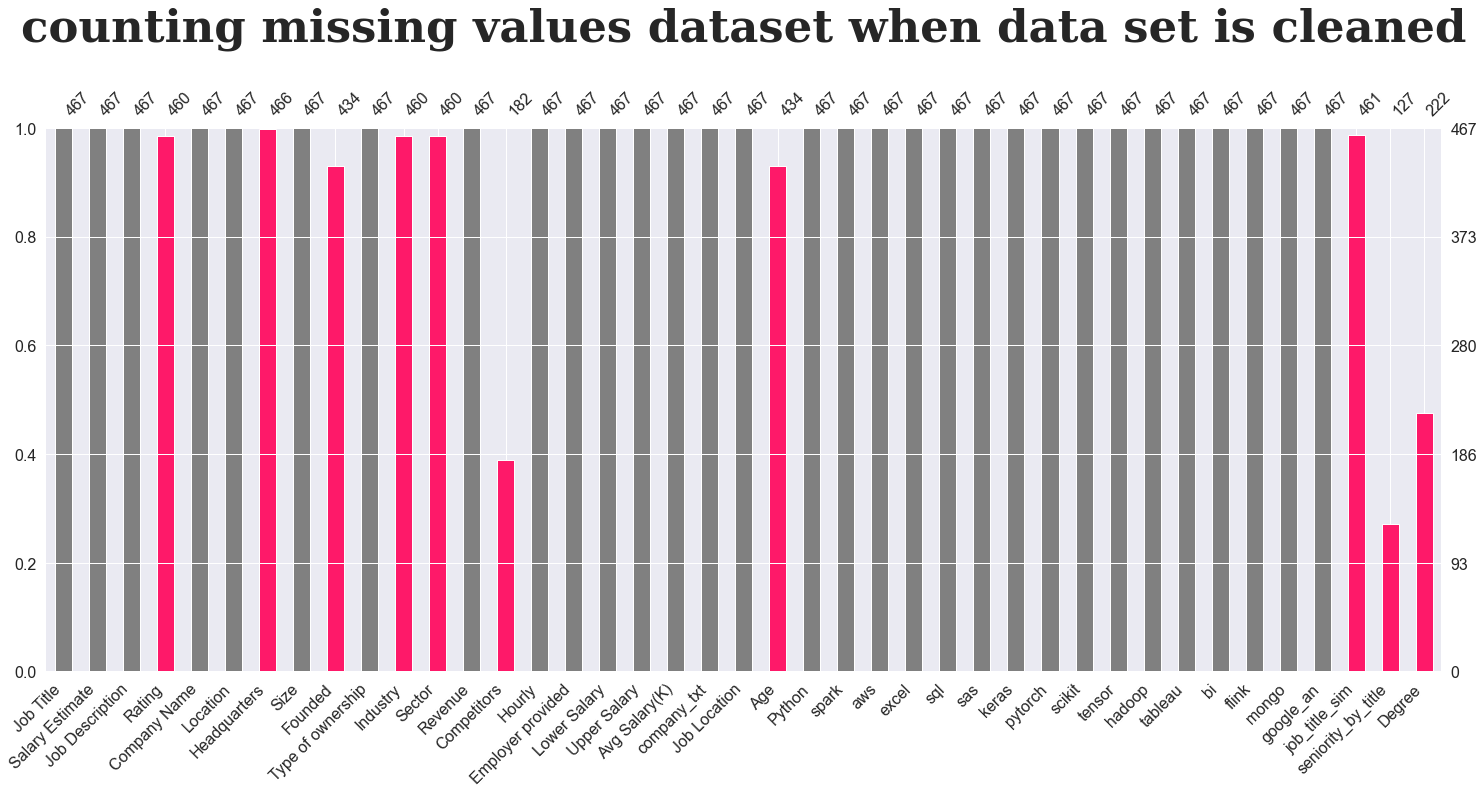

In [58]:
msn.bar(data, color=mis_val_colors)
plt.title('counting missing values dataset when data set is cleaned', size=45, y=1.15, **hfont)
plt.show()

## working with simple distributions

In [23]:
data=pd.read_csv("C:\\Users\\Likhit\\OneDrive\\Desktop\\data_cleaned_2021.csv")

In [24]:
data=data.drop("index",axis=1)

In [26]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [27]:
data=data.replace('-1',np.nan)
data=data.replace(-1,np.nan)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              731 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        741 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             692 non-null    float64
 9   Type of ownership   742 non-null    object 
 10  Industry            732 non-null    object 
 11  Sector              732 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         282 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

In [29]:
data.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                 11
Company Name            0
Location                0
Headquarters            1
Size                    0
Founded                50
Type of ownership       0
Industry               10
Sector                 10
Revenue                 0
Competitors           460
Hourly                  0
Employer provided       0
Lower Salary            0
Upper Salary            0
Avg Salary(K)           0
company_txt             0
Job Location            0
Age                    50
Python                  0
spark                   0
aws                     0
excel                   0
sql                     0
sas                     0
keras                   0
pytorch                 0
scikit                  0
tensor                  0
hadoop                  0
tableau                 0
bi                      0
flink                   0
mongo                   0
google_an               0
job_title_si

In [30]:
## filling missing values with mode of data
data['Rating']=data['Rating'].fillna(data['Rating'].mode())
data['Competitors']=data['Competitors'].fillna(data['Competitors'].mode()[0])
data['Industry']=data['Industry'].fillna(data['Industry'].mode()[0])
data['Sector']=data['Sector'].fillna(data['Sector'].mode()[0])
data['Headquarters']=data['Headquarters'].fillna(data['Headquarters'].mode()[0])

In [31]:
## rating column distribution

C:\Users\Likhit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


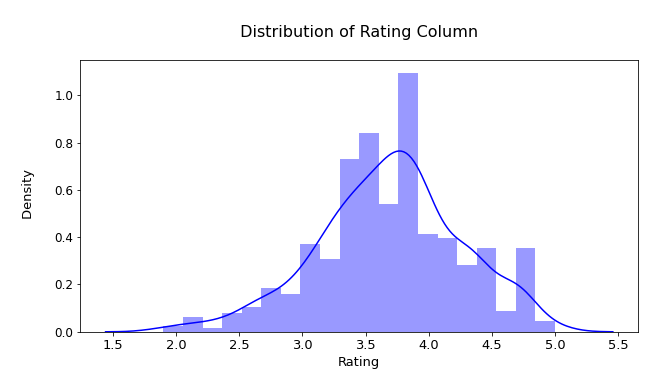

In [32]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Rating Column \n', size=16, color='black')
plt.xlabel('\n Rating \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data.Rating,color="blue")
plt.show()

In [33]:
##Age column distributon

C:\Users\Likhit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


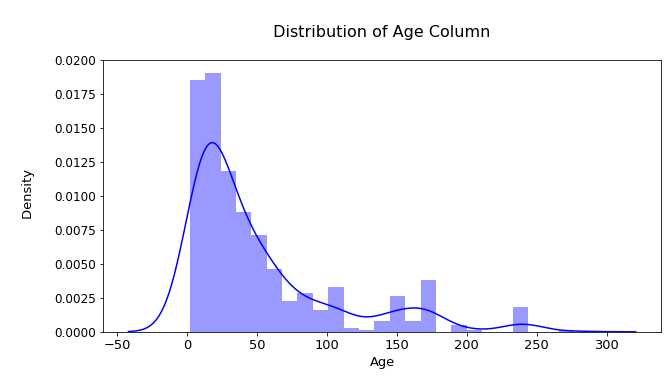

In [34]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Age Column \n', size=16, color='black')
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data.Age,color="blue")
plt.show()

In [35]:
## Founded column

C:\Users\Likhit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


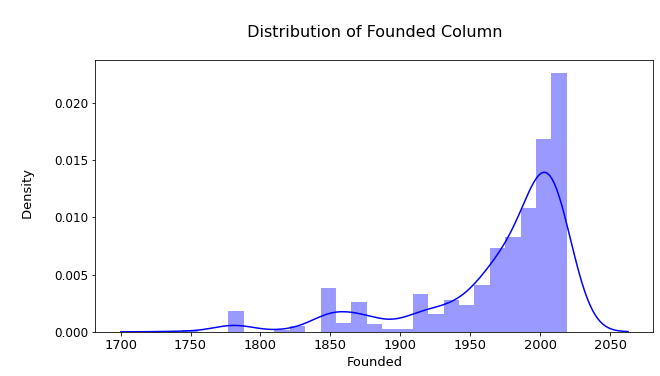

In [36]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Founded Column \n', size=16, color='black')
plt.xlabel('\n Founded \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(data.Founded,color="blue")
plt.show()

## Relation btw degree and salary

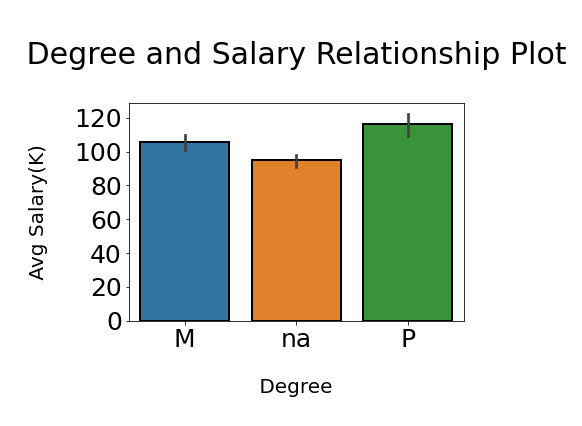

In [37]:
sns.barplot(y='Avg Salary(K)',x='Degree',data=data,linewidth=2,edgecolor='Black')
plt.title('\n Degree and Salary Relationship Plot \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n Degree \n', fontsize=20, color='black')
plt.ylabel('\n Avg Salary(K) \n', fontsize=20, color='black')
plt.show()


#### Relation btw Type of ownership and avgsalary

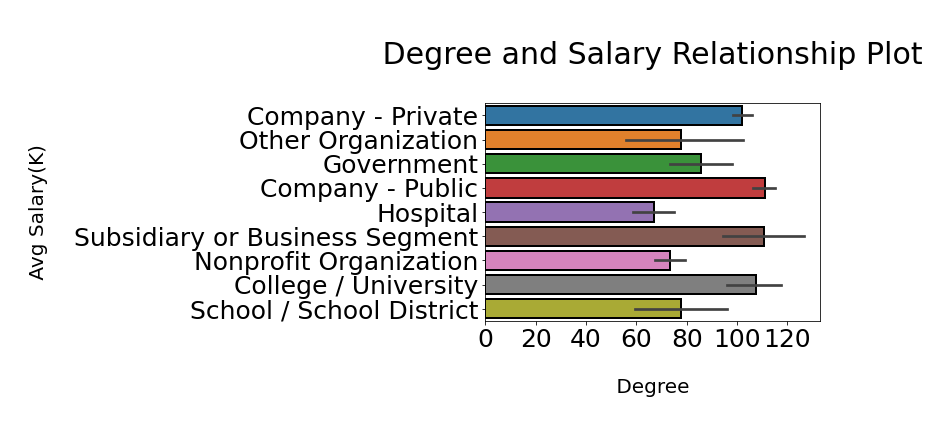

In [38]:
sns.barplot(y='Type of ownership',x='Avg Salary(K)',data=data,linewidth=2,edgecolor='Black')
plt.title('\n Degree and Salary Relationship Plot \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n Degree \n', fontsize=20, color='black')
plt.ylabel('\n Avg Salary(K) \n', fontsize=20, color='black')
plt.show()


## relation btw avg salary and seniority_by_title

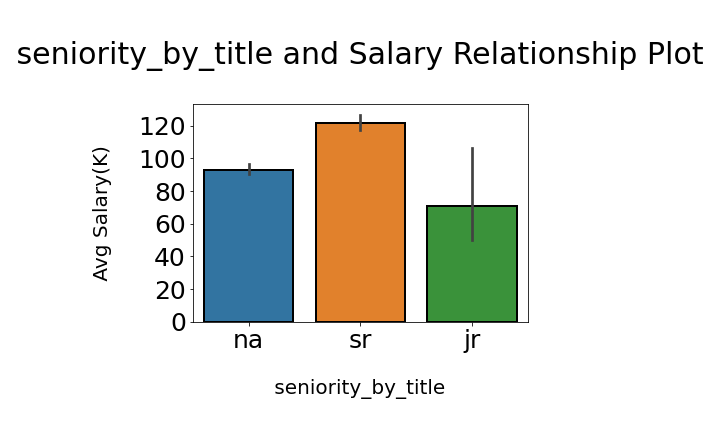

In [39]:
sns.barplot(y="Avg Salary(K)",x="seniority_by_title",data=data,linewidth=2,edgecolor='Black')
plt.title('\n seniority_by_title and Salary Relationship Plot \n', size=30, color='black')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('\n seniority_by_title \n', fontsize=20, color='black')
plt.ylabel('\n Avg Salary(K) \n', fontsize=20, color='black')
plt.show()


## Relation between the company's age and revenue

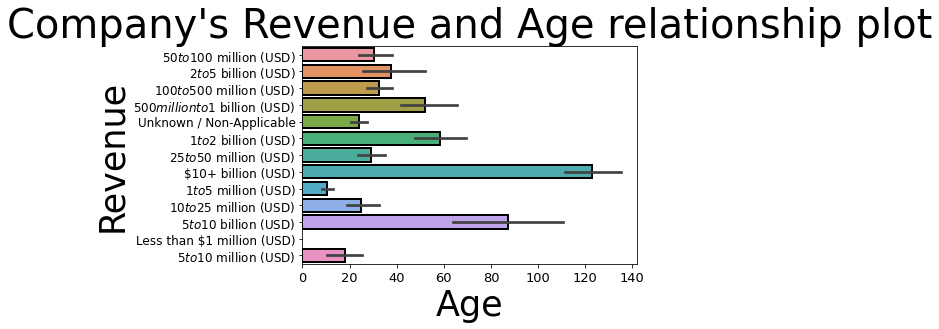

In [40]:
sns.barplot(x='Age',y='Revenue',data=data,linewidth=2,edgecolor='Black')
plt.title("Company's Revenue and Age relationship plot",size=40,color="black")
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Age',fontsize=35,color="black")
plt.ylabel("Revenue",fontsize=35,color="black")
plt.show()


## counting the rating of the companies

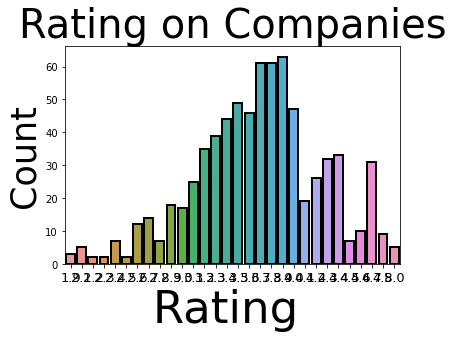

In [41]:
sns.countplot(x='Rating',data=data,linewidth=2,edgecolor='Black')
plt.title("Rating on Companies",size=40,color="black")
plt.xticks(fontsize=13)
#plt.yticks(fontsize=12)
plt.xlabel('Rating ',fontsize=45,color="black")
plt.ylabel("Count",fontsize=35,color="black")
plt.show()

### Counting the Type of Ownership of companies

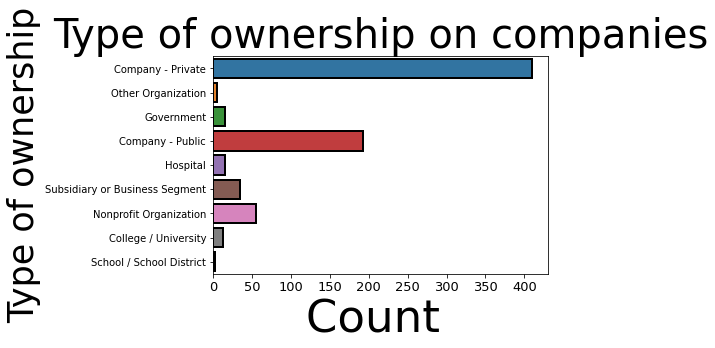

In [42]:
sns.countplot(y='Type of ownership',data=data,linewidth=2,edgecolor='Black')
plt.title("Type of ownership on companies",size=40,color="black")
plt.xticks(fontsize=13)
#plt.yticks(fontsize=12)
plt.xlabel('Count ',fontsize=45,color="black")
plt.ylabel("Type of ownership",fontsize=35,color="black")
plt.show()

## counting the sizee of companies

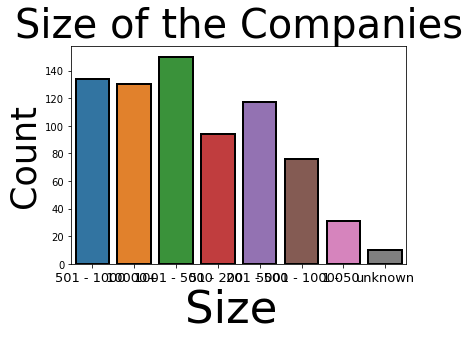

In [43]:
sns.countplot(x='Size',data=data,linewidth=2,edgecolor='Black')
plt.title("Size of the Companies",size=40,color="black")
plt.xticks(fontsize=13)
#plt.yticks(fontsize=12)
plt.xlabel('Size ',fontsize=45,color="black")
plt.ylabel("Count",fontsize=35,color="black")
plt.show()

## counting the revenue of the companies

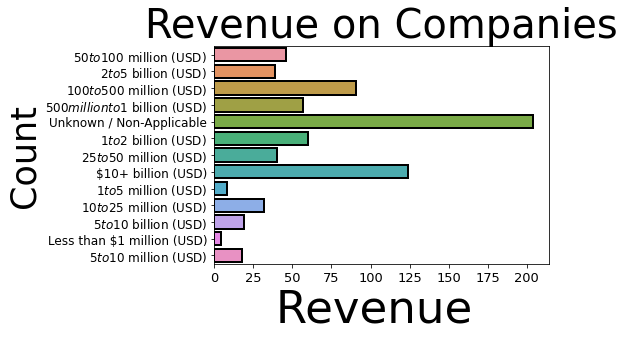

In [44]:
#l=["50 to 100million(USD)","2 to 5billion(USD)","100 to 500million(USD)","500 million to 1 billon(USD)","Unknown/Non-Applicable","1 to 2billion(USD)","25 to 50million(USD)","$10+billion(USD)","1 to 5million","10 to 25million(USD)","5 to 10billion(USD)","Less than $1million(USD)","5 to 10million(USD)"]
sns.countplot(y='Revenue',data=data,linewidth=2,edgecolor='Black')
#plt.legend(['50 to 100million(USD)','2 to 5billion(USD)',"100 to 500million(USD)","500 million to 1 billon(USD)","Unknown/Non-Applicable","1 to 2billion(USD)","25 to 50million(USD)","$10+billion(USD)","1 to 5million","10 to 25million(USD)","5 to 10billion(USD)","Less than $1million(USD)","5 to 10million(USD)"],loc="upper right",framealpha=1,facecolor="yellow",edgecolor="black",shadow=True,fancybox=True)
plt.title("Revenue on Companies",size=40,color="black")
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Revenue ',fontsize=45,color="black")
plt.ylabel("Count",fontsize=35,color="black")
plt.show()

## Classification upon the average salary

#### Average salary by job title

<AxesSubplot:xlabel='job_title_sim'>

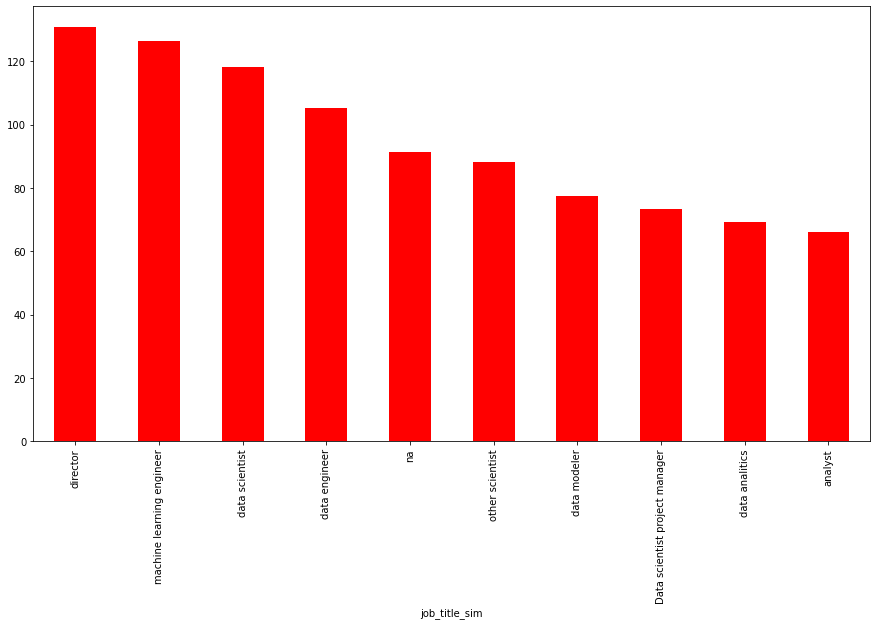

In [45]:
data1=data.groupby('job_title_sim')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
data1.plot.bar(color='red')

#### Average salary by sector

<AxesSubplot:xlabel='Sector'>

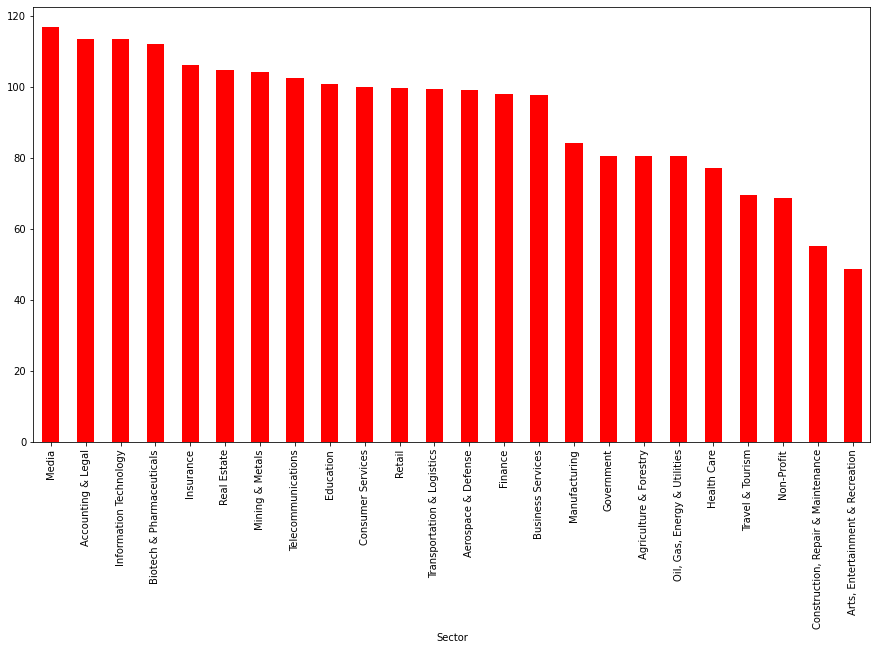

In [46]:
data1=data.groupby('Sector')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize = (15,8))
data1.plot.bar(color='red')

#### Average salary by industry

<AxesSubplot:xlabel='Degree'>

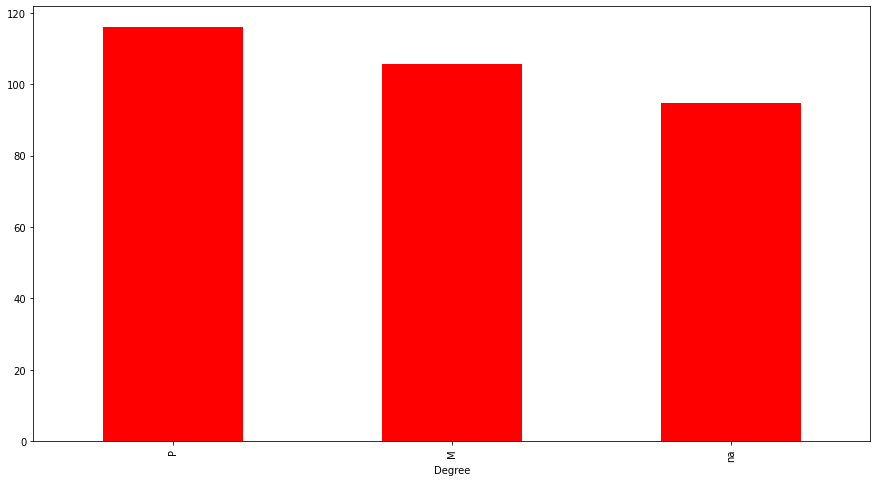

In [47]:
data1=data.groupby('Degree')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,8))
data1.plot.bar(color='red')